In [1]:
pip install Faker

You should consider upgrading via the 'c:\users\vani_\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install pandas

You should consider upgrading via the 'c:\users\vani_\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
# Fabio Wakisaka 1800221
# Engenharia de Computação
# Pólo Americana
# Projeto Integrador VII
# Modelo Preditivo de Turnover em Empresas

import random
import csv
from datetime import datetime, timedelta
from faker import Faker
import pandas as pd
import os

fake = Faker('pt_BR')

# função para gerar data de admissão aleatória
def gerar_data_de_admissao():
    data_inicial = datetime(2010, 1, 1)
    data_final = datetime(2022, 12, 31)
    dias_entre_datas = (data_final - data_inicial).days
    numero_de_dias_aleatorio = random.randrange(dias_entre_datas)
    data_de_admissao = data_inicial + timedelta(days=numero_de_dias_aleatorio)
    return data_de_admissao.strftime('%Y-%m-%d')


# função para gerar data de desligamento aleatória
def gerar_data_de_saida(data_de_admissao):
    if data_de_admissao is None:
        return None
    else:
        data_de_admissao = datetime.strptime(data_de_admissao, '%Y-%m-%d')
        data_final = datetime(2023, 3, 18)
        dias_entre_datas = (data_final - data_de_admissao).days
        numero_de_dias_aleatorio = random.randrange(dias_entre_datas)
        data_de_saida = data_de_admissao + timedelta(days=numero_de_dias_aleatorio)
        return data_de_saida.strftime('%Y-%m-%d')


# criação do dataset
dataset = []
nome_completo_list = []
n_funcionarios = 10000

for i in range(n_funcionarios):
    # geração do nome completo aleatório sem repetições
    nome_completo = fake.name()
    while nome_completo in nome_completo_list:
        nome_completo = fake.name()
    nome_completo_list.append(nome_completo)
    
    # geração do sexo aleatório
    sexo = random.choice(['masculino', 'feminino'])
    
    # geração da idade aleatória entre 18 e 70 anos
    idade = random.randint(18, 70)
    
    # geração do cargo aleatório
    cargos_possiveis = ['Vendedor', 'Supervisor', 'Gerente', 'Superintendente']
    cargo = random.choices(cargos_possiveis, weights=[7, 2, 1, 1], k=1)[0]
    
    # geração do salário aleatório
    if cargo == 'Vendedor':
        salario = round(random.uniform(2000, 4000), 2)
    elif cargo == 'Supervisor':
        salario = round(random.uniform(3000, 5000), 2)
    elif cargo == 'Gerente':
        salario = round(random.uniform(5000, 7000), 2)
    else:
        salario = round(random.uniform(8000, 12000), 2)
    
    # geração da satisfação no trabalho aleatória baseada no cargo e na data de admissão e desligamento
    if i < 600:
        satisfacao_trabalho = random.randint(8, 10)
    elif cargo in ['Gerente', 'Superintendente']:
        satisfacao_trabalho = random.randint(5, 8)
    else:
        satisfacao_trabalho = random.randint(0, 4)
        
    # geração da data de admissão aleatória
    data_admissao = generate_admission_date()
    
    # geração da data de desligamento aleatória
    if i < 600:
        data_desligamento = generate_departure_date(data_admissao)
    else:
        data_desligamento = None
    
    # criação do dicionário com os dados do funcionário
    funcionario = {'nomeCompleto': nome_completo,
                   'sexo': sexo,
                   'idade': idade,
                   'cargo': cargo,
                   'salario': salario,
                   'satisfacaoTrabalho': satisfacao_trabalho,
                   'dataAdmissao': data_admissao,
                   'dataDesligamento': data_desligamento}
    
    dataset.append(funcionario)

# criação do dataframe a partir do dataset
df = pd.DataFrame(dataset)

# criação do arquivo CSV
if not os.path.exists('dataset'):
    os.makedirs('dataset')
df.to_csv('dataset/dataset.csv', index=False)

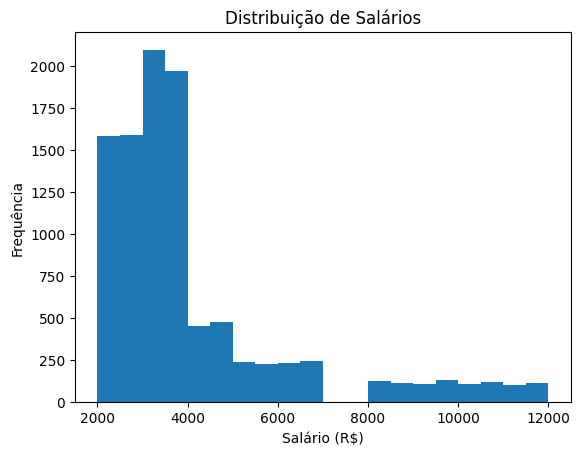

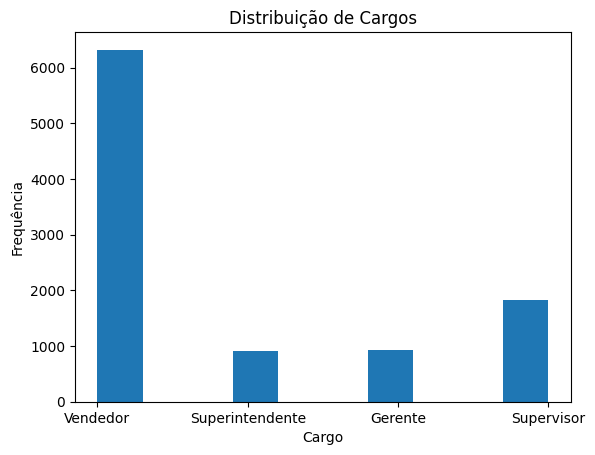

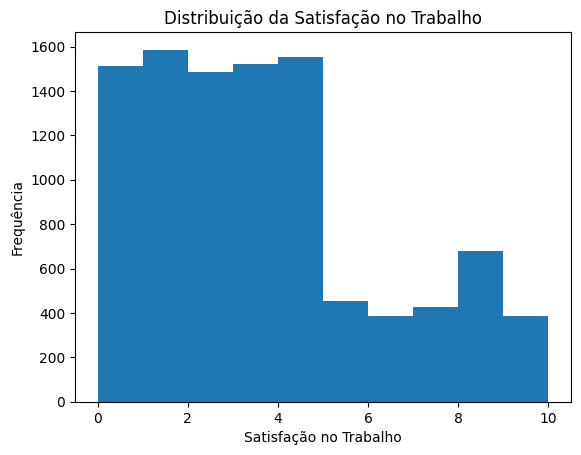

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura do arquivo CSV
df = pd.read_csv('dataset/dataset.csv')

# Gráfico de distribuição do Salário
plt.hist(df['salario'], bins=20)
plt.title('Distribuição de Salários')
plt.xlabel('Salário (R$)')
plt.ylabel('Frequência')
plt.show()

# Gráfico de distribuição do Cargo
plt.hist(df['cargo'])
plt.title('Distribuição de Cargos')
plt.xlabel('Cargo')
plt.ylabel('Frequência')
plt.show()

# Gráfico de distribuição da Satisfação no Trabalho
plt.hist(df['satisfacaoTrabalho'], bins=10)
plt.title('Distribuição da Satisfação no Trabalho')
plt.xlabel('Satisfação no Trabalho')
plt.ylabel('Frequência')
plt.show()


In [9]:


import pandas as pd

# carrega o dataset
df = pd.read_csv('dataset/dataset.csv')

# seleciona apenas os funcionários que foram desligados
funcionarios_demissao = df[df['dataDesligamento'].notnull()]

# calcula o número de funcionários que foram desligados
numero_de_funcionarios_demissao = len(funcionarios_demissao)

# calcula o número total de funcionários admitidos durante o período analisado
numero_de_funcionarios_admissao = len(df)

# calcula o turnover
turnover = (numero_de_funcionarios_demissao / numero_de_funcionarios_admissao) * 100

print(f'O turnover foi de {turnover:.2f}%')


O turnover foi de 6.00%
